# AB Testing

## Sampling

*Sampling* is the process of choosing a portion of a statistical population in order to estimate the characteristics of the entire population. To find patterns and trends in the broader data set being reviewed, *data sampling* is a statistical analysis approach that is used to choose, modify, and analyze a representative selection of data points.

In [1]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr
from scipy.stats import spearmanr,kendalltau,f_oneway,kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
# Sampling
population = np.random.randint(0,80,10000)
population.mean()

39.7435

In [3]:
np.random.seed(115)
sampling = np.random.choice(a=population, size=100)
sampling.mean() # making generalisations with relatively small data

39.8

## Descriptive Statistics

In [4]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Quarter values defined here provide information about the distribution of the relevant variable. For example, since the *mean* and the *median* (50%) are close to each other, no outliers can be inferred. If the relevant variable has outliers, the median should be preferred instead of the mean for the observation.

## Confidence Intervals

A confidence interval is a range of estimates for an unknown parameter in frequentist statistics. A confidence interval is the estimate's mean plus and minus the estimate's range of values. If the test were to be repeated, this is the range of values that, with a particular level of confidence, one would anticipate the estimate to fall between. At a certain degree of confidence, often 95%, a confidence interval is calculated.

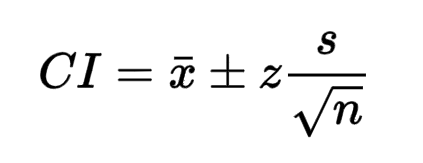

*CI*	=	confidence interval<br>
*x* =	sample mean<br>
*z*	=	confidence level value<br>
*s*	=	sample standard deviation<br>
*n*	=	sample size

In [6]:
sms.DescrStatsW(df["total_bill"]).tconfint_mean()

(18.66333170435847, 20.908553541543164)

In [7]:
sms.DescrStatsW(df["tip"]).tconfint_mean()

(2.823799306281821, 3.1727580707673595)

The tips that incoming customers will leave will be in these two ranges on average.

## Correlation

A statistical measure correlation shows how much two or more variables fluctuate in connection to one another. There is no association between the variables if the correlation is zero. A complete correlation of -1 or 1 means that when one variable changes, the other variables also change. 



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


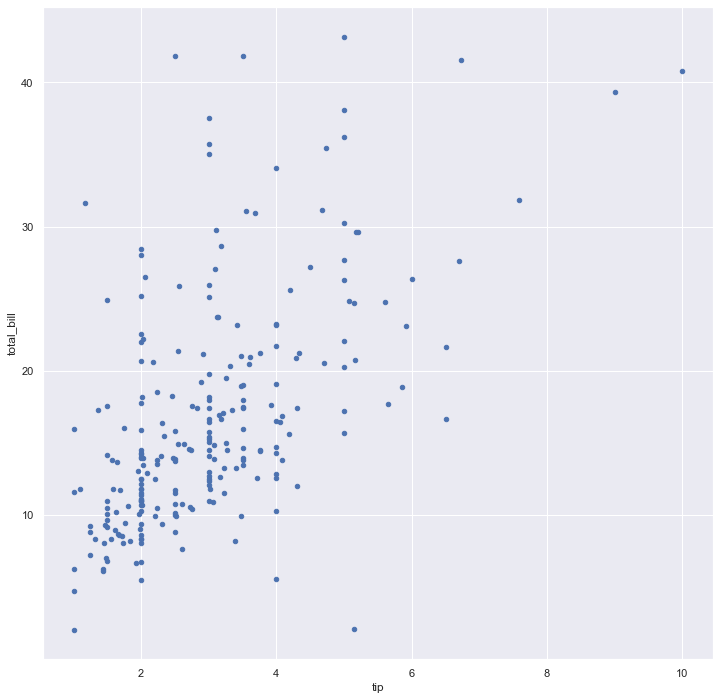

In [8]:
sns.set(rc={"figure.figsize":(12,12)})
df["total_bill"] = df["total_bill"] - df["tip"]
df.plot.scatter("tip","total_bill");

In [9]:
corr = df["tip"].corr(df["total_bill"])
corr

0.5766634471096378

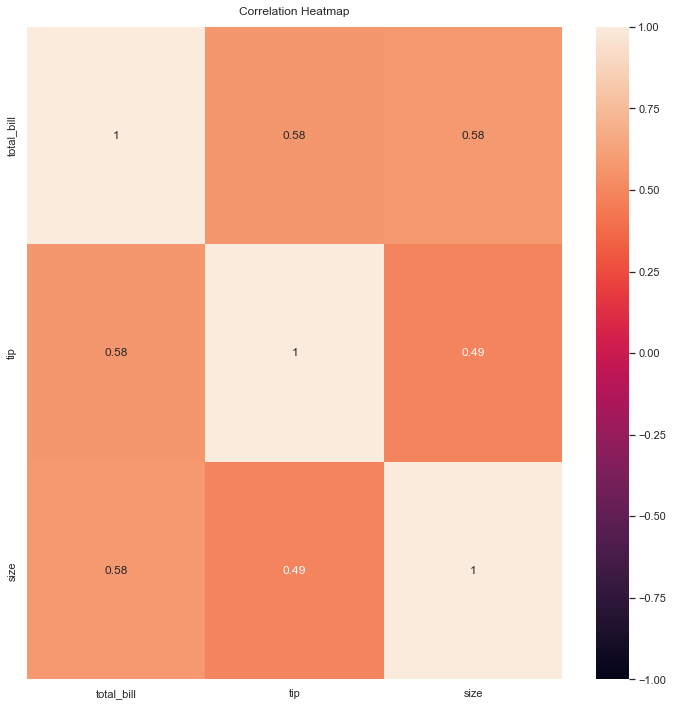

In [10]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Hypothesis Testing

1. Construct hypotheses
2. Assumption Check
    - Normality Assumption
    - Variance Homogeneity
3. Implementation of the Hypothesis
    - Independent two-sample t-test (parametric test) if assumptions are met
    - Mannwhitneyu test if assumptions are not provided (non-parametric test)
    
    
### Checking whether there is a statistical difference between the account averages of smokers and non-smokers

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


In [12]:
df.groupby("smoker").agg({"total_bill":"mean"})

,total_bill
smoker,
Yes,17.747634
No,16.196424


*Hypothesis*<br>
H0 : M1 = M2<br>
H1 : M1 != M2

In [13]:
# Checking normality

test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes","total_bill"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) # H0 is rejected because no normality

Test Stat = 0.9229, p-value = 0.0000


In [14]:
# Independent two-sample t-test (parametric test) if assumptions are met
test_stat, pvalue = ttest_ind(df.loc[df["smoker"] == "Yes","total_bill"],
                           df.loc[df["smoker"] == "No","total_bill"],
                             equal_var=True)

print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) 

Test Stat = 1.4685, p-value = 0.1433


In [15]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
test_stat, pvalue = shapiro(df.loc[df["sex"] == "female","age"].dropna())
print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) 

test_stat2, pvalue2 = shapiro(df.loc[df["sex"] == "male","age"].dropna())
print("Test Stat = %.4f, p-value = %.4f" %(test_stat2,pvalue2)) 

Test Stat = 0.9848, p-value = 0.0071
Test Stat = 0.9747, p-value = 0.0000


In [17]:
test_stat, pvalue = mannwhitneyu(df.loc[df["sex"] == "female","age"].dropna(),
                           df.loc[df["sex"] == "male","age"].dropna(),)

print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) 

Test Stat = 53212.5000, p-value = 0.0261


--------------------------

In [18]:
data_diabets = pd.read_csv("datas/diabetes.csv")
data_diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
data_diabets.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


Turning this into a hypothesis:

H0 : M1 = M2<br>
H1 : M1 != M2<br>

In [20]:
test_stat, pvalue = shapiro(data_diabets.loc[data_diabets["Outcome"] == 1,"Age"].dropna())
print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) 

test_stat2, pvalue2 = shapiro(data_diabets.loc[data_diabets["Outcome"] == 0,"Age"].dropna())
print("Test Stat = %.4f, p-value = %.4f" %(test_stat2,pvalue2)) 

Test Stat = 0.9546, p-value = 0.0000
Test Stat = 0.8012, p-value = 0.0000


In [21]:
test_stat_mw, pvalue_mw = mannwhitneyu(data_diabets.loc[data_diabets["Outcome"] == 1,"Age"].dropna(),
                                 data_diabets.loc[data_diabets["Outcome"] == 0,"Age"].dropna())
print("Test Stat = %.4f, p-value = %.4f" %(test_stat_mw,pvalue_mw)) 

Test Stat = 92050.0000, p-value = 0.0000


------------------------------------
## Business Problem

For an online education-course platform the question is:<br>
*Are the scores of those who watched the majority of the course and those who did not differ from each other?*

In [22]:
data = pd.read_csv("datas/course_reviews.csv")
data.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0,0.0,0.0
1,5.0,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0,0.0,0.0
2,4.5,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0,0.0,0.0
3,5.0,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0,0.0,0.0
4,4.0,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0,0.0,0.0


In [23]:
data.groupby("Rating").agg({"Progress":"count"})

,Progress
Rating,
1.0,15
1.5,2
2.0,12
2.5,11
3.0,62
3.5,96
4.0,383
4.5,475
5.0,3267


In [24]:
# Users' ratings who did not progress until the half of the course
print(data[data["Progress"] <= 25]["Rating"].mean())

# Users' ratings who progressed more than the half of the course
print(data[data["Progress"] >= 75]["Rating"].mean())

4.730646306818182
4.863146551724138


In [25]:
test_stat, pvalue = shapiro(data.loc[data["Progress"] < 25]["Rating"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat,pvalue)) 

test_stat2, pvalue2 = shapiro(data.loc[data["Progress"] > 75]["Rating"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat2,pvalue2)) 

Test Stat = 0.5710, p-value = 0.0000
Test Stat = 0.3160, p-value = 0.0000


*Mann Whitney* test is applied because normality is not provided.

In [26]:
test_stat_man, pvalue_man = mannwhitneyu(data.loc[data["Progress"] < 25]["Rating"],
                                 data.loc[data["Progress"] > 75]["Rating"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat_man,pvalue_man)) 

Test Stat = 491222.5000, p-value = 0.0000


-----------------
# Comparison of Two Groups Odds
## Two Sample Ratio Test

In [27]:
success_rates = np.array([300,250])
observation_rates = np.array([1000,1100])

proportions_ztest(count=success_rates,nobs=observation_rates)

(3.7857863233209255, 0.0001532232957772221)

*Is there a statistical difference between the survival rates of male and female passengers?*

In [28]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
df.groupby("sex").agg({"survived":"mean"})

,survived
sex,
female,0.742038
male,0.188908


In [30]:
df.groupby("sex").agg({"survived":"sum"}) # the success rate

,survived
sex,
female,233
male,109


In [31]:
df.groupby("sex").agg({"survived":"count"}) # observation rate

,survived
sex,
female,314
male,577


In [32]:
female_count = df.loc[df["sex"] == "female","survived"].count()
male_count = df.loc[df["sex"] == "male","survived"].count()

succ_female = df[df["sex"] == "female"]["survived"].sum()
succ_male = df[df["sex"] == "male"]["survived"].sum()

In [33]:
test_z, pvalue = proportions_ztest(count=[succ_female,succ_male],
                                   nobs=[df.loc[df["sex"] == "female","survived"].shape[0],
                                        df.loc[df["sex"] == "male","survived"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" %(test_z,pvalue)) 

Test Stat = 16.2188, p-value = 0.0000


-----------------------------
# Mean Comparison of More than Two Groups

## ANOVA-Analysis of Variance

In [34]:
data_tips = sns.load_dataset("tips")
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [35]:
data_tips.groupby("day").agg({"total_bill":"mean"})

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


Hypothesis:
    
H0 : m1 = m2 = m3 = m4

### Normality Assumption and Variance Homogeneity

One-way ANOVA if assumption is met, Kruskal if not

In [38]:
pvalue = shapiro(data_tips["total_bill"])[1]
print("p-value:%.3f" % pvalue)

p-value:0.000


In [39]:
# normality assumption check

for group in list(data_tips["day"].unique()):
    pvalue = shapiro(data_tips.loc[data_tips["day"] == group, "total_bill"])[1]
    print(group,"p-value:%.4f" % pvalue)

Sun p-value:0.0036
Sat p-value:0.0000
Thur p-value:0.0000
Fri p-value:0.0409


no assumption of normality is provided for any of them since their p-value is less than 0.05. 

In [40]:
# Variance homogeneity check
test_stat, p_val = levene(data_tips.loc[data_tips["day"] == "Sun", "total_bill"],
                         data_tips.loc[data_tips["day"] == "Sat", "total_bill"],
                         data_tips.loc[data_tips["day"] == "Fri", "total_bill"],
                         data_tips.loc[data_tips["day"] == "Thur", "total_bill"])

print("Test Stat = %.4f, p-value = %.4f" %(test_stat,p_val)) 

Test Stat = 0.6654, p-value = 0.5741


In [41]:
data_tips.groupby("day").agg({"total_bill":["mean","median"]})

total_bill       
           mean median
day                   
Thur  17.682742  16.20
Fri   17.151579  15.38
Sat   20.441379  18.24
Sun   21.410000  19.63

In [42]:
# non-parametric anova test
kruskal_statistic, kruskal_pvalue = kruskal(data_tips.loc[data_tips["day"] == "Sun", "total_bill"],
                         data_tips.loc[data_tips["day"] == "Sat", "total_bill"],
                         data_tips.loc[data_tips["day"] == "Fri", "total_bill"],
                         data_tips.loc[data_tips["day"] == "Thur", "total_bill"])

print("Kruskal Test Statistic Result = %.4f, p-value = %.4f" %(kruskal_statistic,kruskal_pvalue)) 

Kruskal Test Statistic Result = 10.4031, p-value = 0.0154


In [43]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(data_tips["total_bill"],data_tips["day"])
tukey = comparison.tukeyhsd(0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fri,Sat,3.2898,0.4541,-2.4799,9.0595,False
Fri,Sun,4.2584,0.2371,-1.5856,10.1025,False
Fri,Thur,0.5312,0.9957,-5.4434,6.5057,False
Sat,Sun,0.9686,0.8968,-2.6088,4.546,False
Sat,Thur,-2.7586,0.2374,-6.5455,1.0282,False
Sun,Thur,-3.7273,0.0668,-7.6264,0.1719,False


In [44]:
tukey10 = comparison.tukeyhsd(0.10)
tukey10.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fri,Sat,3.2898,0.4541,-1.8481,8.4277,False
Fri,Sun,4.2584,0.2371,-0.9457,9.4626,False
Fri,Thur,0.5312,0.9957,-4.7892,5.8515,False
Sat,Sun,0.9686,0.8968,-2.217,4.1543,False
Sat,Thur,-2.7586,0.2374,-6.1308,0.6135,False
Sun,Thur,-3.7273,0.0668,-7.1995,-0.255,True
